In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Gradient Boosting Regression (loss = 'huber') - outliers cut at 3xIQR

In [3]:
gbroc = pd.read_csv('model_results_GBR_outliers_cut.csv')
gbroc.shape[0]

5544

time: 14 ms


In [4]:
gbroc = gbroc.drop_duplicates()
gbroc.shape[0]

5544

time: 8 ms


In [5]:
gbroc.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
gbroc

,SSID,R-squared,MAPE,MdAPE,Row_Count,Outlier%_Cut,JPID_Count
1299,49031887,1.000000,0.000282,0.000048,5,0.000000,1
2936,176312,1.000000,0.000150,0.000107,5,0.000000,1
4467,49620264,1.000000,0.001073,0.000160,5,0.000000,1
3166,3750359,1.000000,0.000288,0.000219,5,0.000000,1
2634,44224199,0.999904,0.112067,0.000245,11,0.000000,4
749,43064309,1.000000,0.001037,0.000330,5,16.666667,1
3866,4353187,1.000000,0.000435,0.000442,5,0.000000,1
2284,60194650,1.000000,0.000417,0.000477,7,0.000000,1
372,32703271,1.000000,0.000707,0.000658,8,20.000000,1
4372,60873620,1.000000,0.001181,0.000665,7,22.222222,1


time: 30 ms


In [6]:
print ("Average MdAPE is", gbroc.MdAPE.mean())
print ("Average MAPE is", gbroc.MAPE.mean())
print ("Average R-squared value is", gbroc['R-squared'].mean())

Average MdAPE is 19.2966324564
Average MAPE is 22.1413533463
Average R-squared value is 0.310331628783
time: 3 ms


In [7]:
gbroc['Underreported'] = gbroc['Row_Count'] < 25
gbroc = gbroc[gbroc.Underreported != True]
gbroc = gbroc.drop(['Underreported'], axis=1)
gbroc.reset_index(inplace=True)
gbroc = gbroc.drop('index', axis=1)
gbroc

,SSID,R-squared,MAPE,MdAPE,Row_Count,Outlier%_Cut,JPID_Count
0,73136164,0.940797,0.353195,0.086229,26,31.578947,1
1,12327358,0.999511,0.350954,0.093880,28,0.000000,4
2,34413443,0.995057,0.256456,0.190624,28,20.000000,1
3,21787354,0.986756,0.437849,0.211925,26,3.703704,1
4,72617259,0.904116,0.563495,0.234632,51,35.443038,1
5,34143415,0.941918,0.475990,0.285457,27,3.571429,1
6,34153416,0.991580,0.548090,0.326963,26,18.750000,3
7,42257462,0.716745,0.537552,0.372340,133,41.921397,3
8,50223461,0.974193,0.716191,0.434306,34,0.000000,1
9,43754366,0.999429,0.501820,0.443866,28,3.448276,2


time: 28 ms


In [8]:
print ("Average MdAPE is", gbroc.MdAPE.mean())
print ("Average MAPE is", gbroc.MAPE.mean())
print ("Average R-squared value is", gbroc['R-squared'].mean())

Average MdAPE is 19.5974056757
Average MAPE is 22.470124227
Average R-squared value is 0.300248467493
time: 4 ms


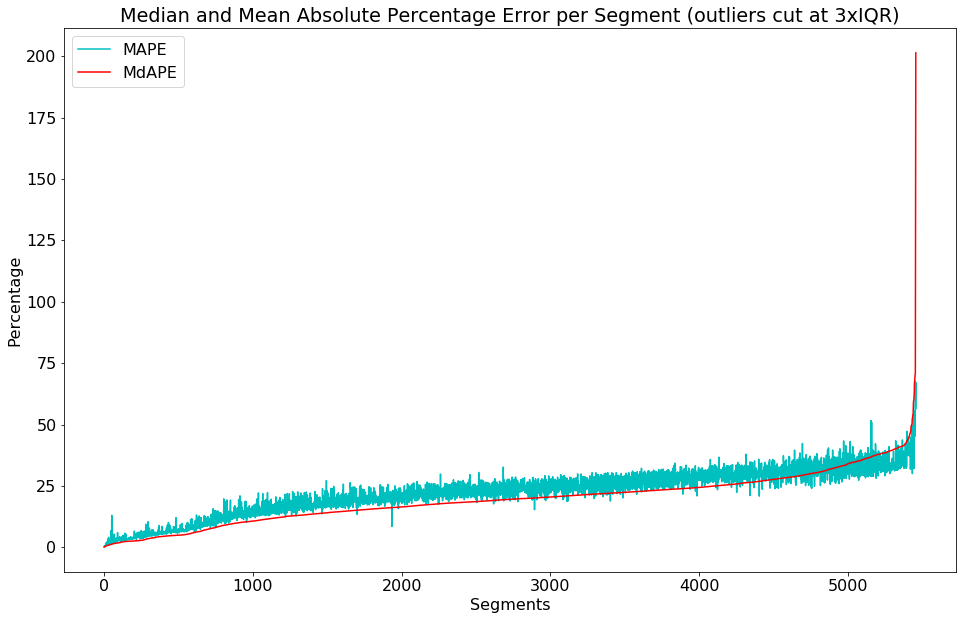

time: 245 ms


In [9]:
fig = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax = fig.add_subplot(111)

ax.plot(gbroc.MAPE, label='MAPE', color='c')
ax.plot(gbroc.MdAPE, label='MdAPE', color='r')

ax.set_title('Median and Mean Absolute Percentage Error per Segment (outliers cut at 3xIQR)')
ax.legend(loc='upper left')
ax.set_ylabel('Percentage')
ax.set_xlabel('Segments')

Gradient Boosting Regression (loss = 'huber') - no outliers cut

In [10]:
gbr_noc = pd.read_csv('model_results_GBR_no_outliers_cut.csv')
gbr_noc.shape[0]

5546

time: 10 ms


In [11]:
gbr_noc = gbr_noc.drop_duplicates()
gbr_noc.shape[0]

5546

time: 8 ms


In [12]:
gbr_noc.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
gbr_noc

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
1299,49031887,1.000000,0.000282,0.000048,5,1
2936,176312,1.000000,0.000150,0.000107,5,1
4202,32943295,0.702602,1.990142,0.000133,10,1
4468,49620264,1.000000,0.001073,0.000160,5,1
3166,3750359,1.000000,0.000288,0.000219,5,1
5466,13580350,1.000000,0.000404,0.000242,5,2
2634,44224199,0.999904,0.112067,0.000245,11,4
3867,4353187,1.000000,0.000435,0.000442,5,1
2284,60194650,1.000000,0.000417,0.000477,7,1
3750,43217342,1.000000,0.000732,0.000705,6,1


time: 25 ms


In [13]:
print ("Average MdAPE is", gbr_noc.MdAPE.mean())
print ("Average MAPE is", gbr_noc.MAPE.mean())
print ("Average R-squared value is", gbr_noc['R-squared'].mean())

Average MdAPE is 20.3810317008
Average MAPE is 24.8279843782
Average R-squared value is 0.287490619336
time: 4 ms


In [14]:
gbr_noc['Underreported'] = gbr_noc['Row_Count'] < 25
gbr_noc = gbr_noc[gbr_noc.Underreported != True]
gbr_noc = gbr_noc.drop(['Underreported'], axis=1)
gbr_noc.reset_index(inplace=True)
gbr_noc = gbr_noc.drop('index', axis=1)
gbr_noc

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
0,12327358,0.999626,0.324500,0.084723,28,4
1,21762177,0.953112,1.293271,0.205381,25,1
2,34143415,0.994899,0.443881,0.284874,28,1
3,21787354,0.998120,0.500915,0.326187,27,1
4,34413443,0.872983,3.281277,0.368546,35,1
5,50223461,0.974193,0.716191,0.434306,34,1
6,34473454,0.766318,1.493719,0.475254,36,1
7,34555022,0.854843,1.585469,0.526987,35,1
8,28402845,0.704050,4.147685,0.609534,25,1
9,32044568,0.911195,2.096418,0.631338,31,1


time: 25 ms


In [15]:
print ("Average MdAPE is", gbr_noc.MdAPE.mean())
print ("Average MAPE is", gbr_noc.MAPE.mean())
print ("Average R-squared value is", gbr_noc['R-squared'].mean())

Average MdAPE is 20.6905140699
Average MAPE is 25.1892680976
Average R-squared value is 0.277186867812
time: 3 ms


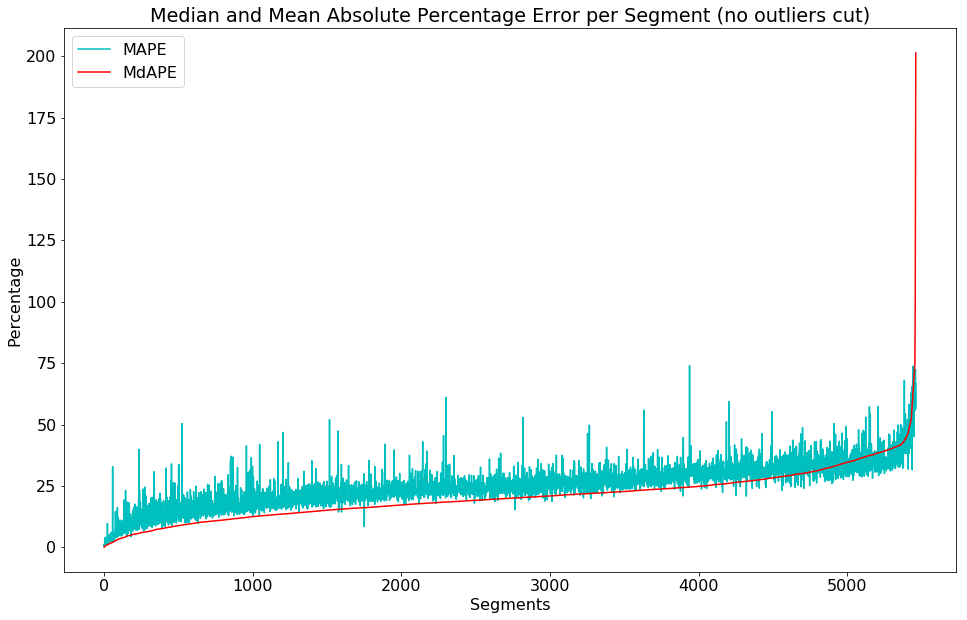

time: 210 ms


In [16]:
fig1 = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax1 = fig1.add_subplot(111)

ax1.plot(gbr_noc.MAPE, label='MAPE', color='c')
ax1.plot(gbr_noc.MdAPE, label='MdAPE', color='r')

ax1.set_title('Median and Mean Absolute Percentage Error per Segment (no outliers cut)')
ax1.legend(loc='upper left')
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Segments')

Linear Regression (default settings, not normalised) - no outliers cut

In [17]:
linr = pd.read_csv('model_results_LinR_no_outliers_cut.csv')
linr.shape[0]

5546

time: 10 ms


In [18]:
linr = linr.drop_duplicates()
linr.shape[0]

5546

time: 6 ms


In [19]:
linr.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
linr

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
2936,176312,1.000000,2.190498e-15,0.000000e+00,5,1
3867,4353187,1.000000,4.471459e-15,0.000000e+00,5,1
3166,3750359,1.000000,6.558856e-15,0.000000e+00,5,1
4589,43084267,1.000000,6.845306e-15,0.000000e+00,7,1
2177,32713272,0.534483,2.209945e+00,0.000000e+00,9,1
3750,43217342,1.000000,5.444772e-15,4.254747e-15,6,1
3921,2714521,1.000000,2.035939e-14,1.376354e-14,8,1
4468,49620264,1.000000,1.450087e-14,1.776357e-14,5,1
5466,13580350,1.000000,1.958617e-14,2.030122e-14,5,2
1299,49031887,1.000000,1.845566e-14,2.842171e-14,5,1


time: 24 ms


In [20]:
print ("Average MdAPE is", linr.MdAPE.mean())
print ("Average MAPE is", linr.MAPE.mean())
print ("Average R-squared value is", linr['R-squared'].mean())

Average MdAPE is 25.7951252661
Average MAPE is 29.2003623054
Average R-squared value is 0.16904164326
time: 3 ms


In [21]:
linr['Underreported'] = linr['Row_Count'] < 25
linr = linr[linr.Underreported != True]
linr = linr.drop(['Underreported'], axis=1)
linr.reset_index(inplace=True)
linr = linr.drop('index', axis=1)
linr

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
0,34143415,0.246916,5.269851,2.583368,28,1
1,74067409,0.040824,4.782953,3.437445,3015,1
2,74077404,0.057068,6.064186,3.472632,612,1
3,12327358,0.972940,5.943636,3.505851,28,4
4,14801358,0.916831,6.206915,3.611389,56,4
5,42257462,0.211492,7.322720,3.825666,229,3
6,32493263,0.693851,12.614847,4.233172,33,1
7,50223461,0.088033,5.176068,4.494001,34,1
8,42807462,0.047703,9.443987,4.671143,1184,1
9,37155175,0.056353,10.138502,4.675140,1629,5


time: 26 ms


In [22]:
print ("Average MdAPE is", linr.MdAPE.mean())
print ("Average MAPE is", linr.MAPE.mean())
print ("Average R-squared value is", linr['R-squared'].mean())

Average MdAPE is 26.04498778
Average MAPE is 29.4778569018
Average R-squared value is 0.160666909772
time: 4 ms


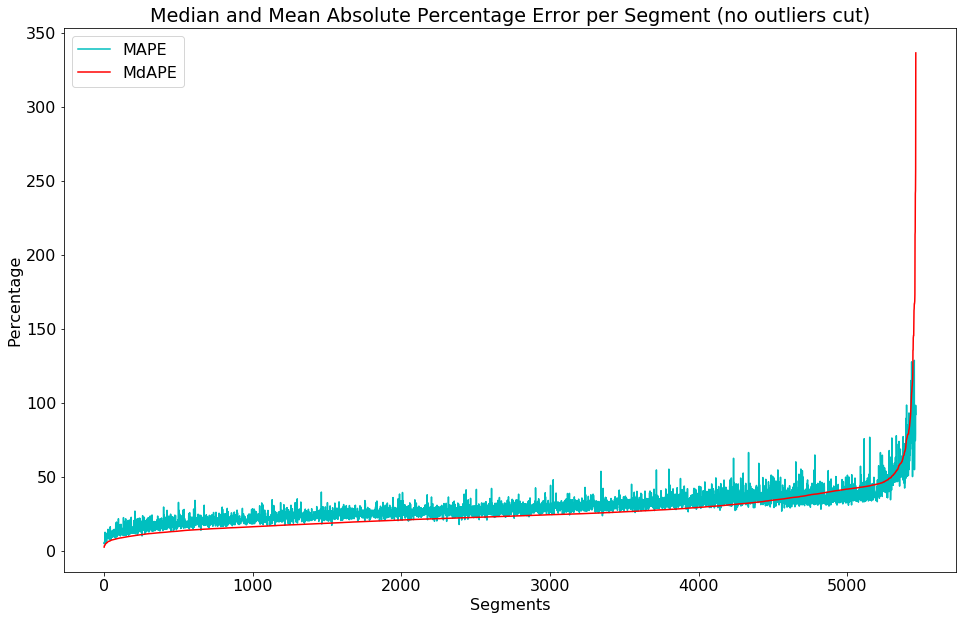

time: 195 ms


In [23]:
fig2 = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax2 = fig2.add_subplot(111)

ax2.plot(linr.MAPE, label='MAPE', color='c')
ax2.plot(linr.MdAPE, label='MdAPE', color='r')

ax2.set_title('Median and Mean Absolute Percentage Error per Segment (no outliers cut)')
ax2.legend(loc='upper left')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Segments')

Support Vector Machine Regression (default settings, not normalised) - no outliers cut

In [24]:
svr = pd.read_csv('model_results_SVR_no_outliers_cut.csv')
svr.shape[0]

5546

time: 11 ms


In [25]:
svr = svr.drop_duplicates()
svr.shape[0]

5546

time: 5 ms


In [26]:
svr.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
svr

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
1299,49031887,-0.499088,7.856842,0.100272,5,1
2634,44224199,-0.380996,25.499535,0.347347,11,4
4570,32905168,0.013493,5.068281,0.453953,14,1
2177,32713272,0.587377,2.345310,0.476002,9,1
4202,32943295,0.090350,4.351698,0.500709,10,1
1344,45920980,-0.057020,8.498934,0.501966,16,1
4468,49620264,0.508373,5.378135,0.502803,5,1
2470,21762177,-0.020276,10.160006,0.750938,25,1
2162,42074209,-0.114242,11.074062,1.246076,22,3
1996,32673268,0.552516,2.874930,1.425040,13,1


time: 26 ms


In [27]:
print ("Average MdAPE is", svr.MdAPE.mean())
print ("Average MAPE is", svr.MAPE.mean())
print ("Average R-squared value is", svr['R-squared'].mean())

Average MdAPE is 21.6757666706
Average MAPE is 29.1278690421
Average R-squared value is -0.0268357582551
time: 5 ms


In [28]:
svr['Underreported'] = svr['Row_Count'] < 25
svr = svr[svr.Underreported != True]
svr = svr.drop(['Underreported'], axis=1)
svr.reset_index(inplace=True)
svr = svr.drop('index', axis=1)
svr

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
0,21762177,-0.020276,10.160006,0.750938,25,1
1,42257462,0.015381,7.430984,1.485944,229,3
2,74077404,-0.006445,4.630328,1.641314,612,1
3,34143415,0.039226,4.695587,1.726124,28,1
4,72527248,-0.007523,12.933845,1.840406,80,1
5,70867087,0.001134,8.133122,2.062930,109,1
6,22286127,0.002608,8.461822,2.069108,531,1
7,39833985,0.017680,8.541463,2.095319,387,3
8,42807462,0.013830,8.912287,2.138103,1184,1
9,72557249,0.027198,9.896934,2.326873,73,1


time: 25 ms


In [29]:
print ("Average MdAPE is", svr.MdAPE.mean())
print ("Average MAPE is", svr.MAPE.mean())
print ("Average R-squared value is", svr['R-squared'].mean())

Average MdAPE is 21.7465521116
Average MAPE is 29.143631914
Average R-squared value is -0.0262859844865
time: 4 ms


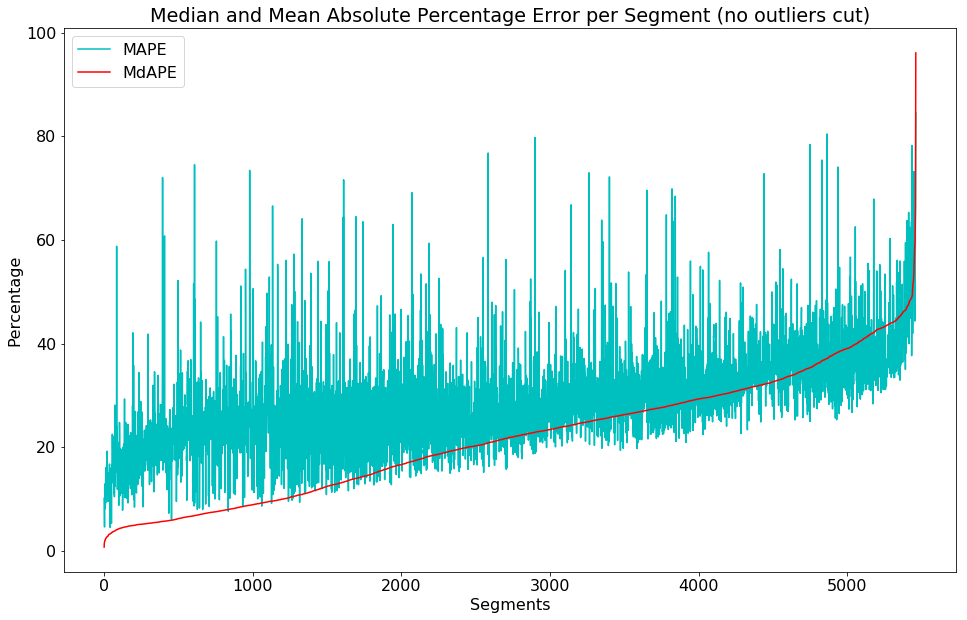

time: 243 ms


In [30]:
fig3 = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax3 = fig3.add_subplot(111)

ax3.plot(svr.MAPE, label='MAPE', color='c')
ax3.plot(svr.MdAPE, label='MdAPE', color='r')

ax3.set_title('Median and Mean Absolute Percentage Error per Segment (no outliers cut)')
ax3.legend(loc='upper left')
ax3.set_ylabel('Percentage')
ax3.set_xlabel('Segments')

Decision Tree with AdaBoost Regression (default settings) - no outliers cut

In [31]:
adb = pd.read_csv('model_results_ABR_no_outliers_cut.csv')
adb.shape[0]

5546

time: 9 ms


In [32]:
adb = adb.drop_duplicates()
adb.shape[0]

5546

time: 5 ms


In [33]:
adb.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
adb

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
389,6920694,1.000000,0.000000,0.000000,6,1
464,46734409,1.000000,0.000000,0.000000,7,3
1299,49031887,1.000000,0.000000,0.000000,5,1
2177,32713272,1.000000,0.000000,0.000000,9,1
2849,25382607,1.000000,0.000000,0.000000,7,1
2936,176312,1.000000,0.000000,0.000000,5,1
3166,3750359,1.000000,0.000000,0.000000,5,1
3435,43664479,1.000000,0.000000,0.000000,5,1
3750,43217342,1.000000,0.000000,0.000000,6,1
3867,4353187,1.000000,0.000000,0.000000,5,1


time: 25 ms


In [34]:
print ("Average MdAPE is", adb.MdAPE.mean())
print ("Average MAPE is", adb.MAPE.mean())
print ("Average R-squared value is", adb['R-squared'].mean())

Average MdAPE is 33.787006091
Average MAPE is 34.1420254814
Average R-squared value is 0.10576111198
time: 4 ms


In [35]:
adb['Underreported'] = adb['Row_Count'] < 25
adb = adb[adb.Underreported != True]
adb = adb.drop(['Underreported'], axis=1)
adb.reset_index(inplace=True)
adb = adb.drop('index', axis=1)
adb

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
0,12327358,0.998357,1.508363,0.988701,28,4
1,21762177,0.988217,1.622833,1.000000,25,1
2,34143415,0.932467,2.133239,1.910714,28,1
3,74077404,0.285976,4.905915,1.942304,612,1
4,50223461,0.841642,2.475643,2.178707,34,1
5,73541975,0.986303,4.524673,3.000000,37,1
6,21787354,0.950154,3.566185,3.125000,27,1
7,34133414,0.962444,6.179657,3.404993,48,4
8,34473454,0.625947,4.197070,3.409825,36,1
9,50967145,0.970270,5.123281,3.641457,27,1


time: 25 ms


In [36]:
print ("Average MdAPE is", adb.MdAPE.mean())
print ("Average MAPE is", adb.MAPE.mean())
print ("Average R-squared value is", adb['R-squared'].mean())

Average MdAPE is 34.2358213563
Average MAPE is 34.5837035528
Average R-squared value is 0.0932632004769
time: 4 ms


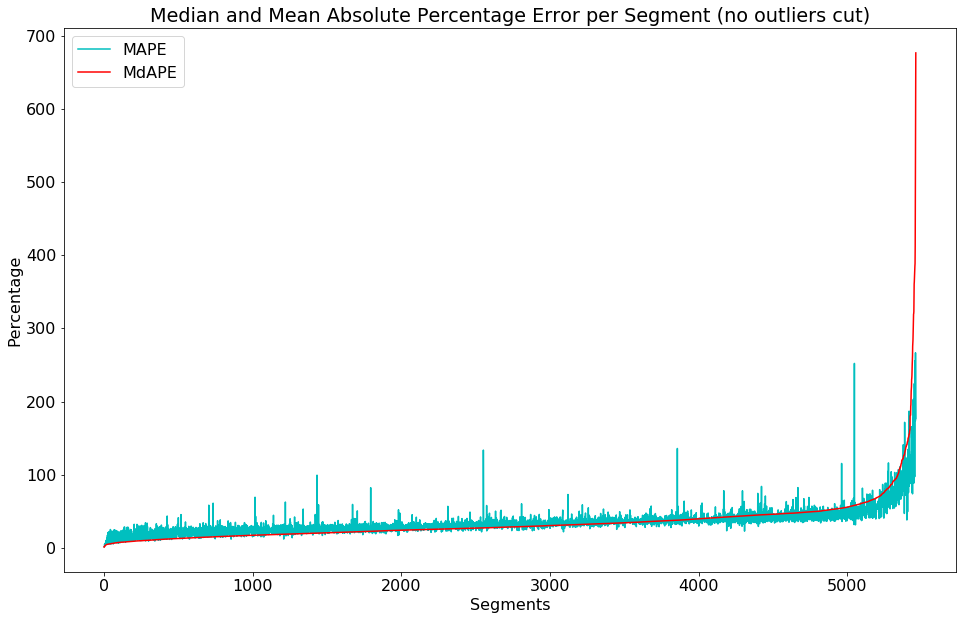

time: 199 ms


In [37]:
fig4 = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax4 = fig4.add_subplot(111)

ax4.plot(adb.MAPE, label='MAPE', color='c')
ax4.plot(adb.MdAPE, label='MdAPE', color='r')

ax4.set_title('Median and Mean Absolute Percentage Error per Segment (no outliers cut)')
ax4.legend(loc='upper left')
ax4.set_ylabel('Percentage')
ax4.set_xlabel('Segments')

Random Forest Regression (n_estimators=250, max_depth=4, min_samples_leaf=10, min_samples_split=20) - no outliers cut

(Note: these were the best settings found for two segments for Random Forest Regression - it's clear that optimised settings for some segments don't transfer to all.  Default settings not used as these were overfitting for all segments tested and would give a deceptively poisitive score)

In [38]:
rfr = pd.read_csv('model_results_RFR_no_outliers_cut.csv')
rfr.shape[0]

5546

time: 10 ms


In [39]:
rfr = rfr.drop_duplicates()
rfr.shape[0]

5546

time: 5 ms


In [40]:
rfr.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
rfr

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
1444,74077404,1.008393e-01,5.171397,2.543790,612,1
4468,49620264,-5.079365e-07,8.573061,2.992000,5,1
1996,32673268,-2.352000e-04,4.917133,3.364615,13,1
2108,42807462,6.972890e-02,9.026128,3.492455,1184,1
3644,74067409,1.026775e-01,4.678126,3.542905,3015,1
3556,34143415,4.613175e-03,5.610731,3.729634,28,1
2467,42257462,1.677697e-01,7.342771,4.021235,229,3
2936,176312,-3.361649e-05,3.318412,4.063658,5,1
2365,37453746,6.992323e-02,13.274071,4.081437,1200,2
3246,39833985,1.132192e-01,8.631587,4.098624,387,3


time: 27 ms


In [41]:
print ("Average MdAPE is", rfr.MdAPE.mean())
print ("Average MAPE is", rfr.MAPE.mean())
print ("Average R-squared value is", rfr['R-squared'].mean())

Average MdAPE is 26.0821870617
Average MAPE is 29.7856164035
Average R-squared value is 0.147804700796
time: 3 ms


In [42]:
rfr['Underreported'] = rfr['Row_Count'] < 25
rfr = rfr[rfr.Underreported != True]
rfr = rfr.drop(['Underreported'], axis=1)
rfr.reset_index(inplace=True)
rfr = rfr.drop('index', axis=1)
rfr

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
0,74077404,0.100839,5.171397,2.543790,612,1
1,42807462,0.069729,9.026128,3.492455,1184,1
2,74067409,0.102677,4.678126,3.542905,3015,1
3,34143415,0.004613,5.610731,3.729634,28,1
4,42257462,0.167770,7.342771,4.021235,229,3
5,37453746,0.069923,13.274071,4.081437,1200,2
6,39833985,0.113219,8.631587,4.098624,387,3
7,10503656,0.084127,11.636322,4.442354,1215,1
8,42373442,0.179748,8.309074,4.488523,1184,1
9,70867087,0.154493,8.322697,4.489673,109,1


time: 24 ms


In [43]:
print ("Average MdAPE is", rfr.MdAPE.mean())
print ("Average MAPE is", rfr.MAPE.mean())
print ("Average R-squared value is", rfr['R-squared'].mean())

Average MdAPE is 25.8699849576
Average MAPE is 29.7163143044
Average R-squared value is 0.150109902059
time: 5 ms


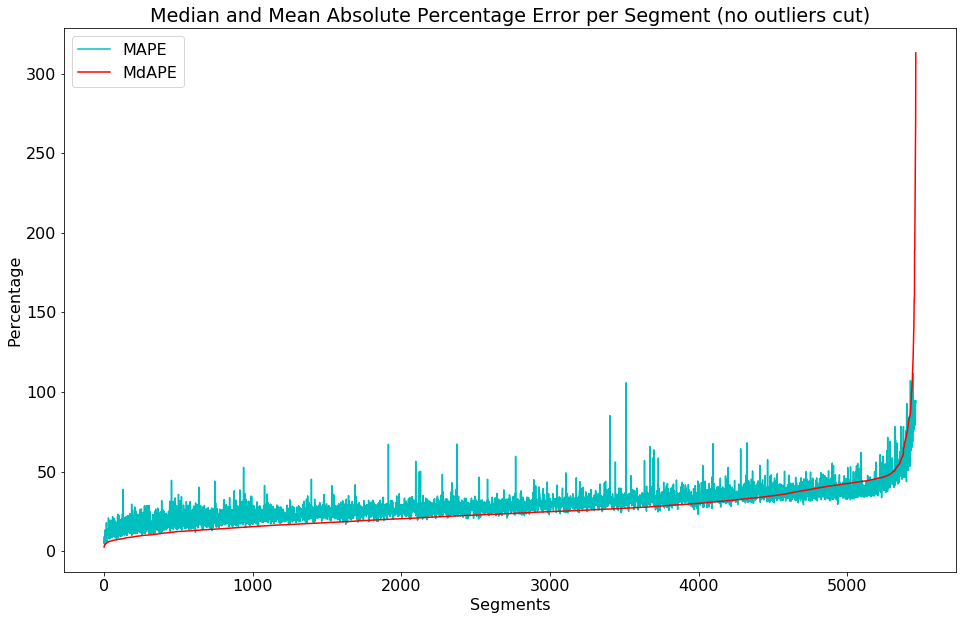

time: 224 ms


In [44]:
fig5 = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax5 = fig5.add_subplot(111)

ax5.plot(rfr.MAPE, label='MAPE', color='c')
ax5.plot(rfr.MdAPE, label='MdAPE', color='r')

ax5.set_title('Median and Mean Absolute Percentage Error per Segment (no outliers cut)')
ax5.legend(loc='upper left')
ax5.set_ylabel('Percentage')
ax5.set_xlabel('Segments')